In [1]:
!git clone https://github.com/saeedzou/InsulatorDetSeg.git
!git clone https://github.com/InsulatorData/InsulatorDataSet

Cloning into 'InsulatorDetSeg'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 96 (delta 0), reused 1 (delta 0), pack-reused 93
Receiving objects: 100% (96/96), 106.70 MiB | 19.30 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Cloning into 'InsulatorDataSet'...
remote: Enumerating objects: 1964, done.
remote: Total 1964 (delta 0), reused 0 (delta 0), pack-reused 1964
Receiving objects: 100% (1964/1964), 387.92 MiB | 37.05 MiB/s, done.
Resolving deltas: 100% (1094/1094), done.
Updating files: 100% (1946/1946), done.


In [3]:
!pip -q install ultralytics
from utils import auto_generate_masks, convert_xywh_xyxy, generate_yolo_labels, get_unique_dims, make_train_valid
from ultralytics import SAM
from ultralytics.models.sam import Predictor as SAMPredictor
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.9 MB/s eta 0:00:00


In [4]:
# generate txt label files for YOLO format
root_path = '/content/InsulatorDataSet'
generate_yolo_labels(root_path=root_path,
                     xml_path='Normal_Insulators/labels',
                     txt_path='Normal_Insulators/labels')
generate_yolo_labels(root_path=root_path,
                     xml_path='Defective_Insulators/labels/insulator',
                     txt_path='Defective_Insulators/labels')

In [5]:
# split data into train and test
make_train_valid(root='/content/InsulatorDataSet', val_size=0.2)

In [6]:
%%writefile CLIPD_v8.yaml
path: '/content/InsulatorDataSet/'
train: 'train/images'
val: 'valid/images'

# class names
names:
    0: 'insulator'

Writing CLIPD_v8.yaml


In [7]:
# Create SAMPredictor
overrides = dict(conf=0.3, task='segment', mode='predict', model="mobile_sam.pt", imgsz=1024, verbose=False)
predictor = SAMPredictor(overrides=overrides)

In [ ]:
# make Autogenerated masks using mobile SAM model
HEIGHT = 864
WIDTH = 1152
ROOT = '/content/InsulatorDataSet'
auto_generate_masks(root=ROOT,
                    split='train',
                    sam_predictor=predictor,
                    height=HEIGHT,
                    width=WIDTH)
auto_generate_masks(root=ROOT,
                    split='valid',
                    sam_predictor=predictor,
                    height=HEIGHT,
                    width=WIDTH)

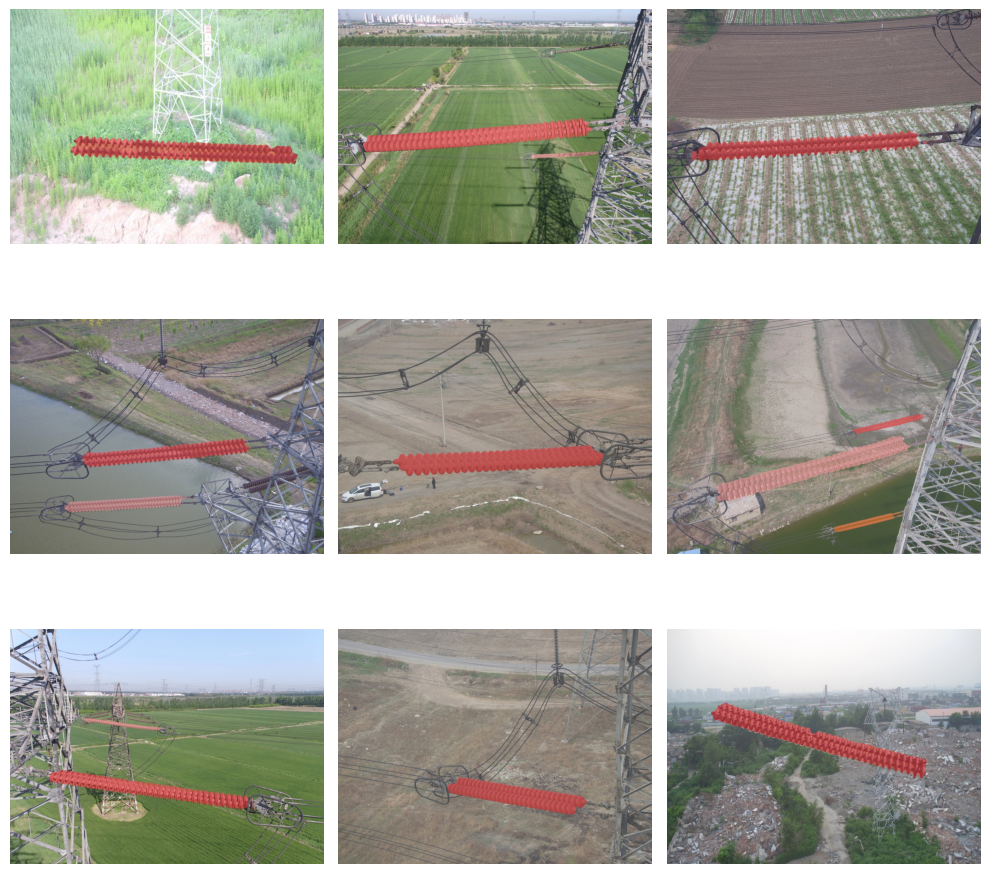

In [14]:
# plot autogenerated segment masks
from PIL import Image
path = '/content/runs/segment/predict'
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        img = random.choice(os.listdir(path))
        img = Image.open(os.path.join(path, img))
        ax[i, j].imshow(img)
        ax[i, j].axis('off')
plt.tight_layout()
plt.show()